In [15]:
import torch
import matplotlib.pyplot as plt
import pullback
from pullback import get_metric
import geomstats.backend as gs
import numpy as np

In [5]:
filename = "results/trained_models/experimental_2022-07-19 14:30:00_model.pt"

metric = get_metric(intrinsic_dim=1, model_filename=filename)


points = gs.linspace(0,2*gs.pi,100)
zero = gs.zeros(1)
distances_from_zero = []

for point in points:
    distances_from_zero.append(metric.dist(zero,point))

distances_from_zero = np.array(distances_from_zero)

[]

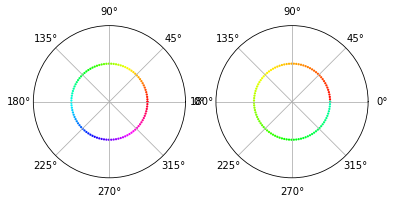

In [52]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

xval = np.linspace(0, 2*np.pi, 100)
yval = np.ones_like(xval)


colormap = plt.get_cmap('hsv')
norm = mpl.colors.Normalize(0.0, 2*np.pi)

ax1 = plt.subplot(1, 2, 1, polar=True)
ax1.scatter(xval, yval, c=xval, s=5, cmap=colormap, norm=norm, linewidths=0)
ax2 = plt.subplot(1,2,2, polar=True)
ax2.scatter(xval,yval,c=distances_from_zero,s=5,cmap=colormap,norm=norm,linewidths=0)
ax1.set_yticks([])
ax2.set_yticks([])

In [47]:
distances_from_zero.shape

(40,)

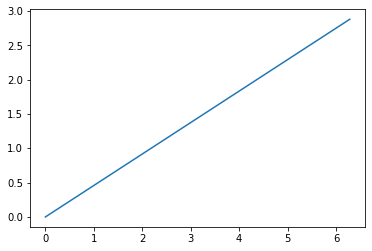

In [57]:
plt.plot(xval,distances_from_zero)

In [10]:
point_a = torch.tensor([4*torch.pi])
point_b = torch.tensor([0.0])
dist = metric.dist(point_a,point_b)
dist

tensor(12.5664)

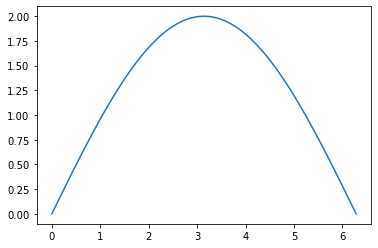

In [79]:
plt.plot(xvals,yvals)

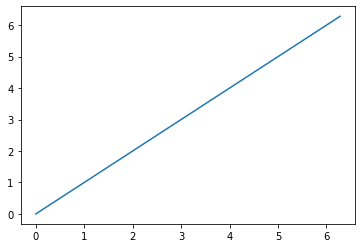

In [7]:
plt.plot(xvals,distances_from_zero)

In [8]:
distances_from_zero[-1]

6.2831855

In [17]:
import os
os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs

import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings("ignore")

from geomstats.geometry.pullback_metric import PullbackMetric
import torch

In [3]:
def immersion(theta):
    return gs.stack([gs.cos(theta),gs.sin(theta)],axis=-1)

In [4]:
metric = PullbackMetric(dim=1, embedding_dim=2, immersion=immersion)

In [21]:
point_a = torch.tensor([2*torch.pi])
point_b = torch.tensor([0.0])
dist = metric.dist(point_a,point_b)
dist

tensor(6.2832)

In [9]:
from geomstats.geometry.hypersphere import HypersphereMetric

In [13]:
circle_metric = HypersphereMetric(dim=1)

In [25]:
A = immersion(point_a)
B = immersion(point_b)


circle_metric.dist(A,B)

tensor([0.])

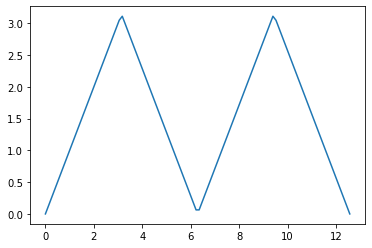

In [26]:
import numpy as np
zero = torch.tensor([1.0,0.0])

thetas = np.linspace(0,4*np.pi,100)
points = immersion(thetas)


distances = []

for point in points:
    distances.append(circle_metric.dist(zero,point))

plt.plot(thetas, distances)

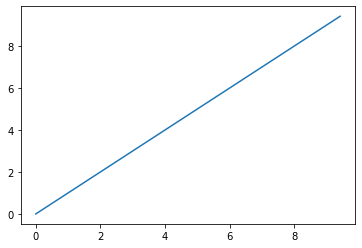

In [29]:
thetas = np.linspace(0,3*np.pi,100)
metric = PullbackMetric(dim=1, embedding_dim=2, immersion=immersion)

zero = torch.tensor([0.0])

distances = []

for theta in thetas:
    distances.append(metric.dist(zero,theta))

plt.plot(thetas,distances)
    

In [30]:
def sphere_immersion(spherical_coords):
    theta = spherical_coords[..., 0]
    phi = spherical_coords[..., 1]
    return gs.array(
        [gs.cos(phi) * gs.sin(theta), gs.sin(phi) * gs.sin(theta), gs.cos(theta)]
    )

In [32]:
point_a = gs.array([gs.pi/2,0])
point_b = gs.array([gs.pi/2,gs.pi])

sphere_metric1 = PullbackMetric(dim=2, embedding_dim=3, immersion=sphere_immersion)
# can use intrinsic coords

dist1 = sphere_metric1.dist(point_a,point_b)

sphere_metric2 = HypersphereMetric(dim=2)
# must use "extrinsic" coords

dist2 = sphere_metric2.dist(sphere_immersion(point_a),sphere_immersion(point_b))

print("distance between points (pi/2,0) and (pi/2,pi) calculated using:")
print("1. pull-back metric: " + str(dist1.item()))
print("2. hypersphere metric: " + str(dist2.item()))


distance between points (pi/2,0) and (pi/2,pi) calculated using:
1. pull-back metric: 3.141592264175415
2. hypersphere metric: 3.1415927410125732


In [40]:
sphere_metric2 = HypersphereMetric(dim=2)

In [65]:
point_a = gs.array([gs.pi/2,gs.pi/2])
point_b = gs.array([gs.pi/2,-gs.pi/2])

# point_a = gs.array([0.0,1.0,0.0])
# point_b = gs.array([0.0,-1.0,0.0])
point_a = sphere_immersion(point_a)
point_b = sphere_immersion(point_b)
sphere_metric2.dist(point_a,point_b)

tensor(3.1416)